In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


## Data Preprocessing

In [6]:
df = pd.read_csv("dataset.csv")

In [7]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [8]:
# the dimensions of data set
df.shape

(4424, 35)

In [9]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

### Checking for Missing Value

In [10]:
print("\nDataset Info")
df.info()


Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation        

In [61]:
print("\n Statistical Summary of Data")
print(df.describe())


 Statistical Summary of Data
       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447  

In [14]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

##### no missing values present in the dataset

## Exploratory Data Analysis

Target Variable Distribution:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


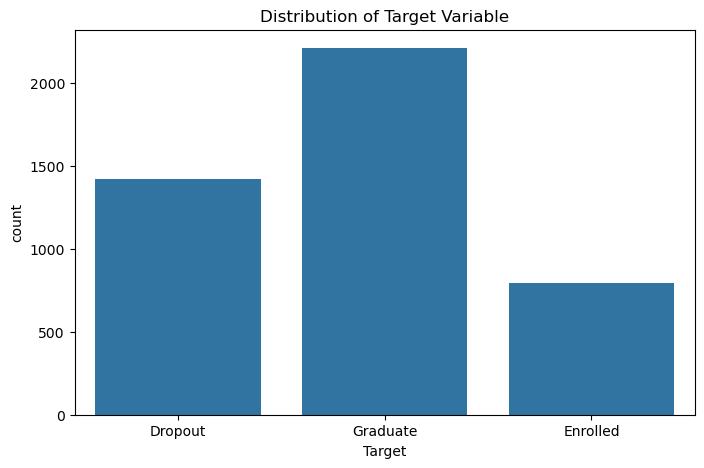

In [15]:
print("Target Variable Distribution:")
print(df['Target'].value_counts())

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Target')
plt.title('Distribution of Target Variable')
plt.show()

The dataset has three classes: Graduate, Dropout, and Enrolled.

The classes are imbalanced. The dataset has a large number of 'Graduate' and 'Dropout' samples, but relatively few 'Enrolled' samples.

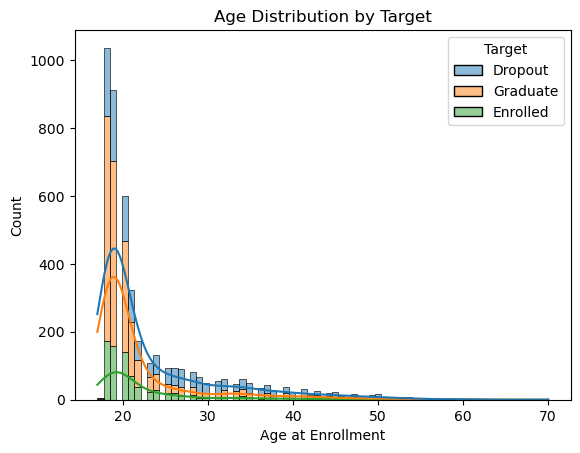

In [17]:
sns.histplot(df, x='Age at enrollment', hue='Target', kde=True, multiple='stack')
plt.title('Age Distribution by Target')
plt.xlabel('Age at Enrollment')
plt.ylabel('Count')
plt.show()


This plot shows how students ages at enrollment vary across the three target categories. Most students enroll between ages 17–25, with Dropouts and Graduates peaking around 19–20 years. Dropouts have a longer tail, meaning older students are more likely to drop out. Very few students enroll after age 30 across all categories.

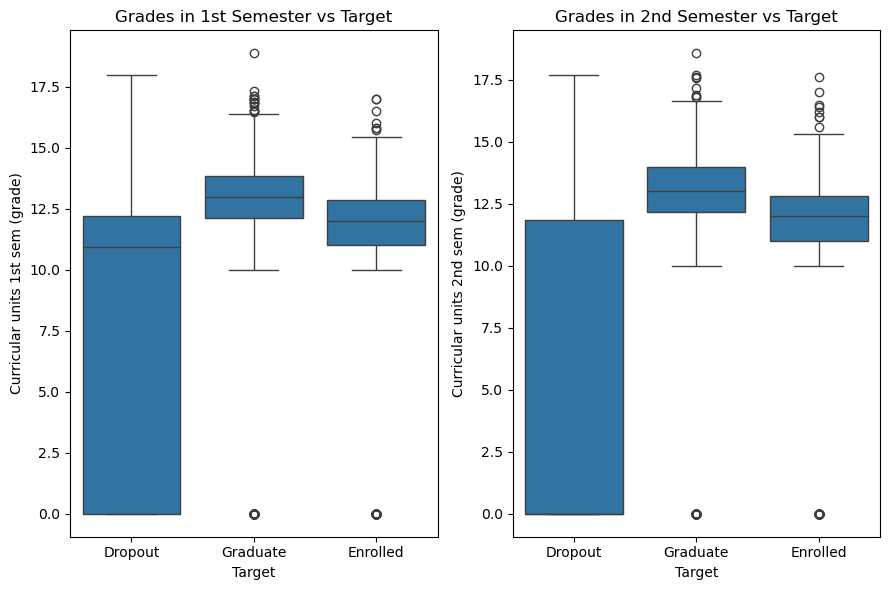

In [18]:
plt.figure(figsize=(9, 6))

# 1st Semester Grades
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Target', y='Curricular units 1st sem (grade)')
plt.title('Grades in 1st Semester vs Target')

# 2nd Semester Grades
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Target', y='Curricular units 2nd sem (grade)')
plt.title('Grades in 2nd Semester vs Target')

plt.tight_layout()
plt.show()


Graduates generally have the highest and most consistent grades in both semesters, with fewer low outliers. Dropouts show a wider spread and lower median grades, indicating poorer academic performance. Enrolled students lie in between but are closer to graduates, suggesting they are more likely to continue than drop out.

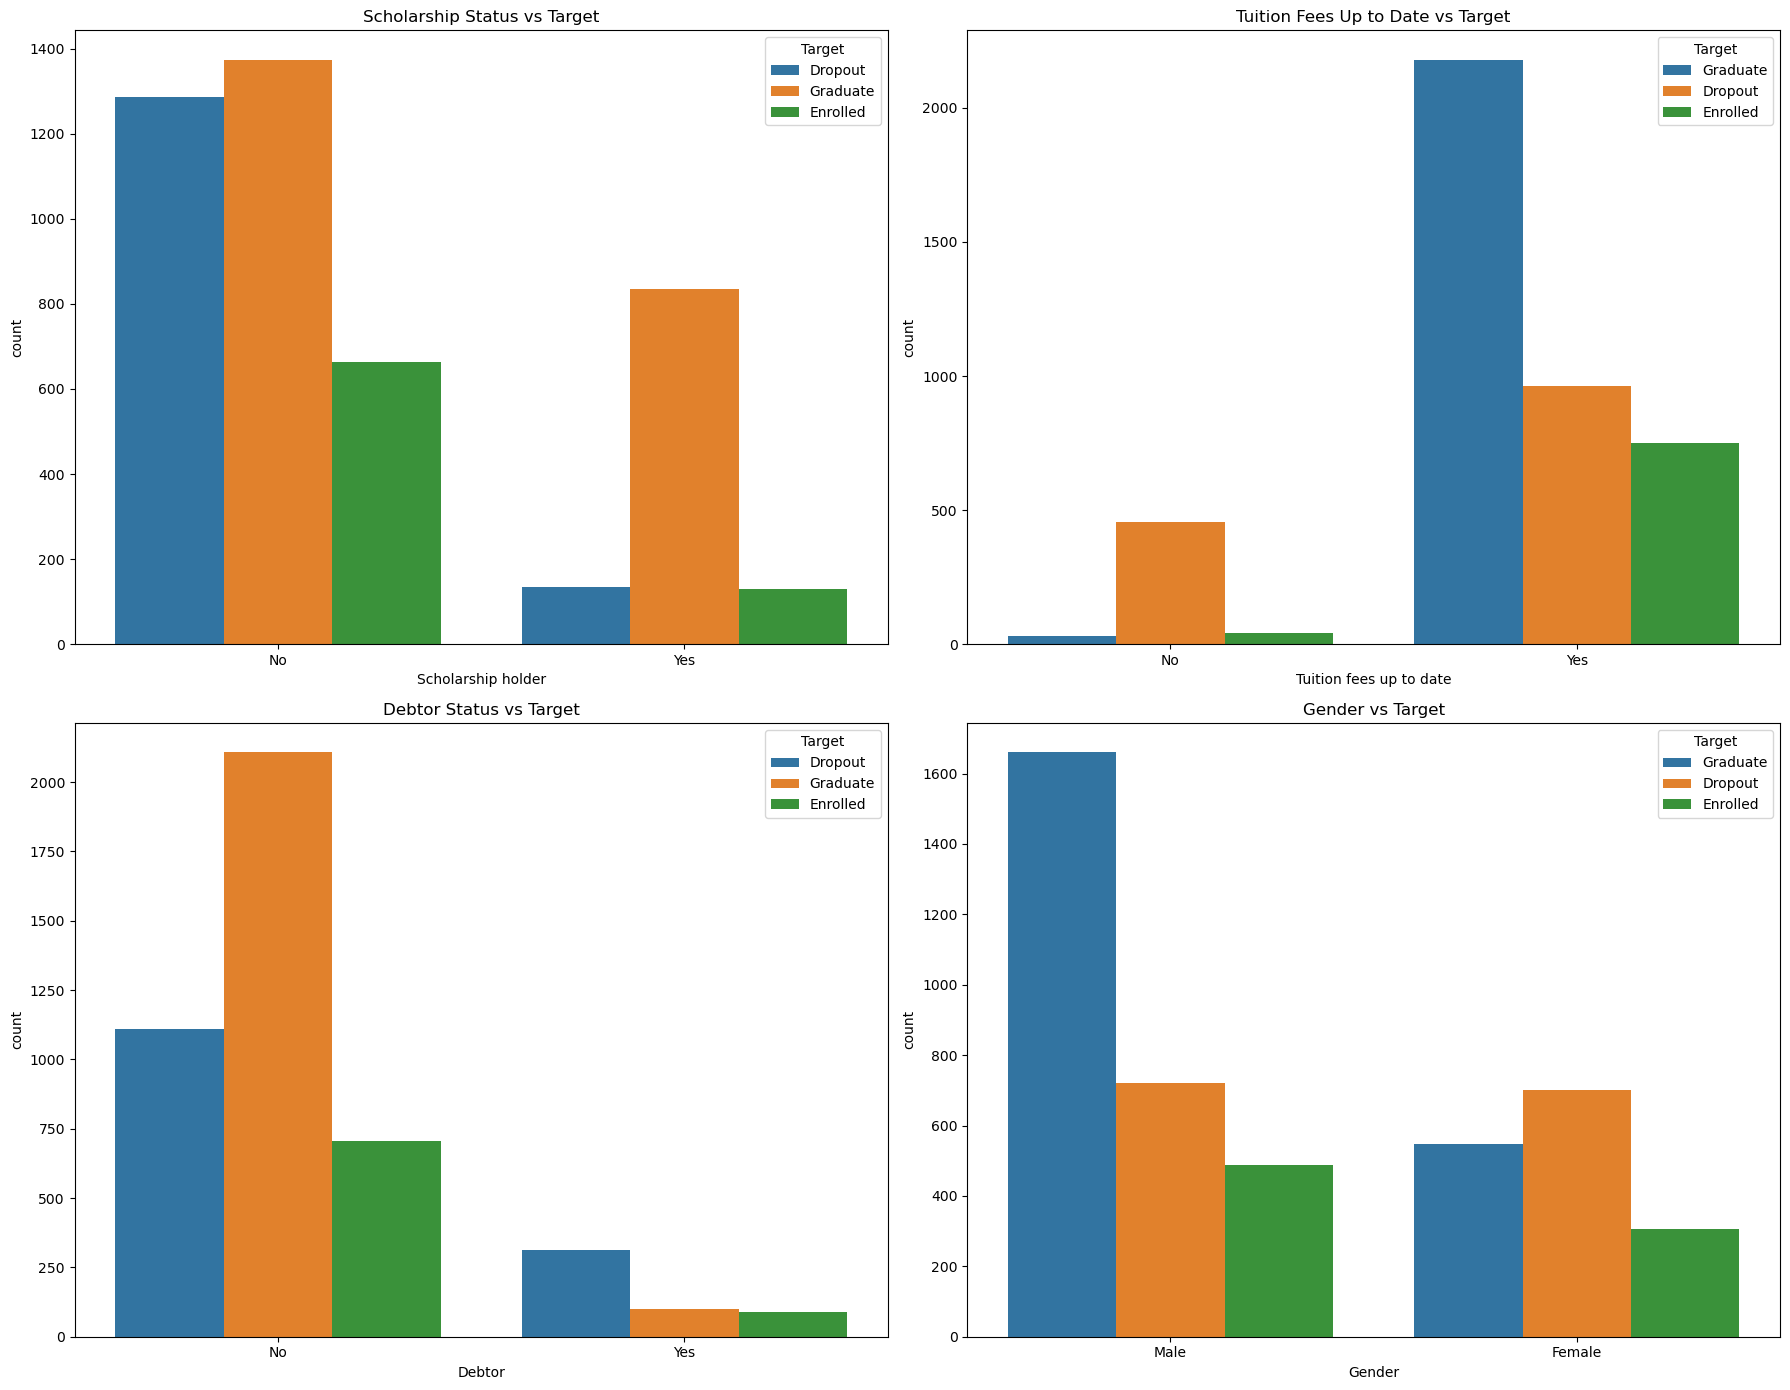

In [20]:
plt.figure(figsize=(18, 14))

# Scholarship holder
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Scholarship holder', hue='Target')
plt.title('Scholarship Status vs Target')
plt.xticks([0, 1], ['No', 'Yes'])

# Tuition fees up to date
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Tuition fees up to date', hue='Target')
plt.title('Tuition Fees Up to Date vs Target')
plt.xticks([0, 1], ['No', 'Yes'])

# Debtor
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Debtor', hue='Target')
plt.title('Debtor Status vs Target')
plt.xticks([0, 1], ['No', 'Yes'])

# Gender
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Gender', hue='Target')
plt.title('Gender vs Target')
plt.xticks([0, 1], ['Male', 'Female'])

plt.tight_layout()
plt.show()


Students with scholarships and those who keep their tuition fees up to date show much higher graduation rates, while those without them are more likely to drop out. Debtor students have a significantly higher dropout count compared to non-debtors, indicating financial struggles as a strong dropout factor. Gender shows a slight difference, with males having more dropouts, while females show a more balanced distribution

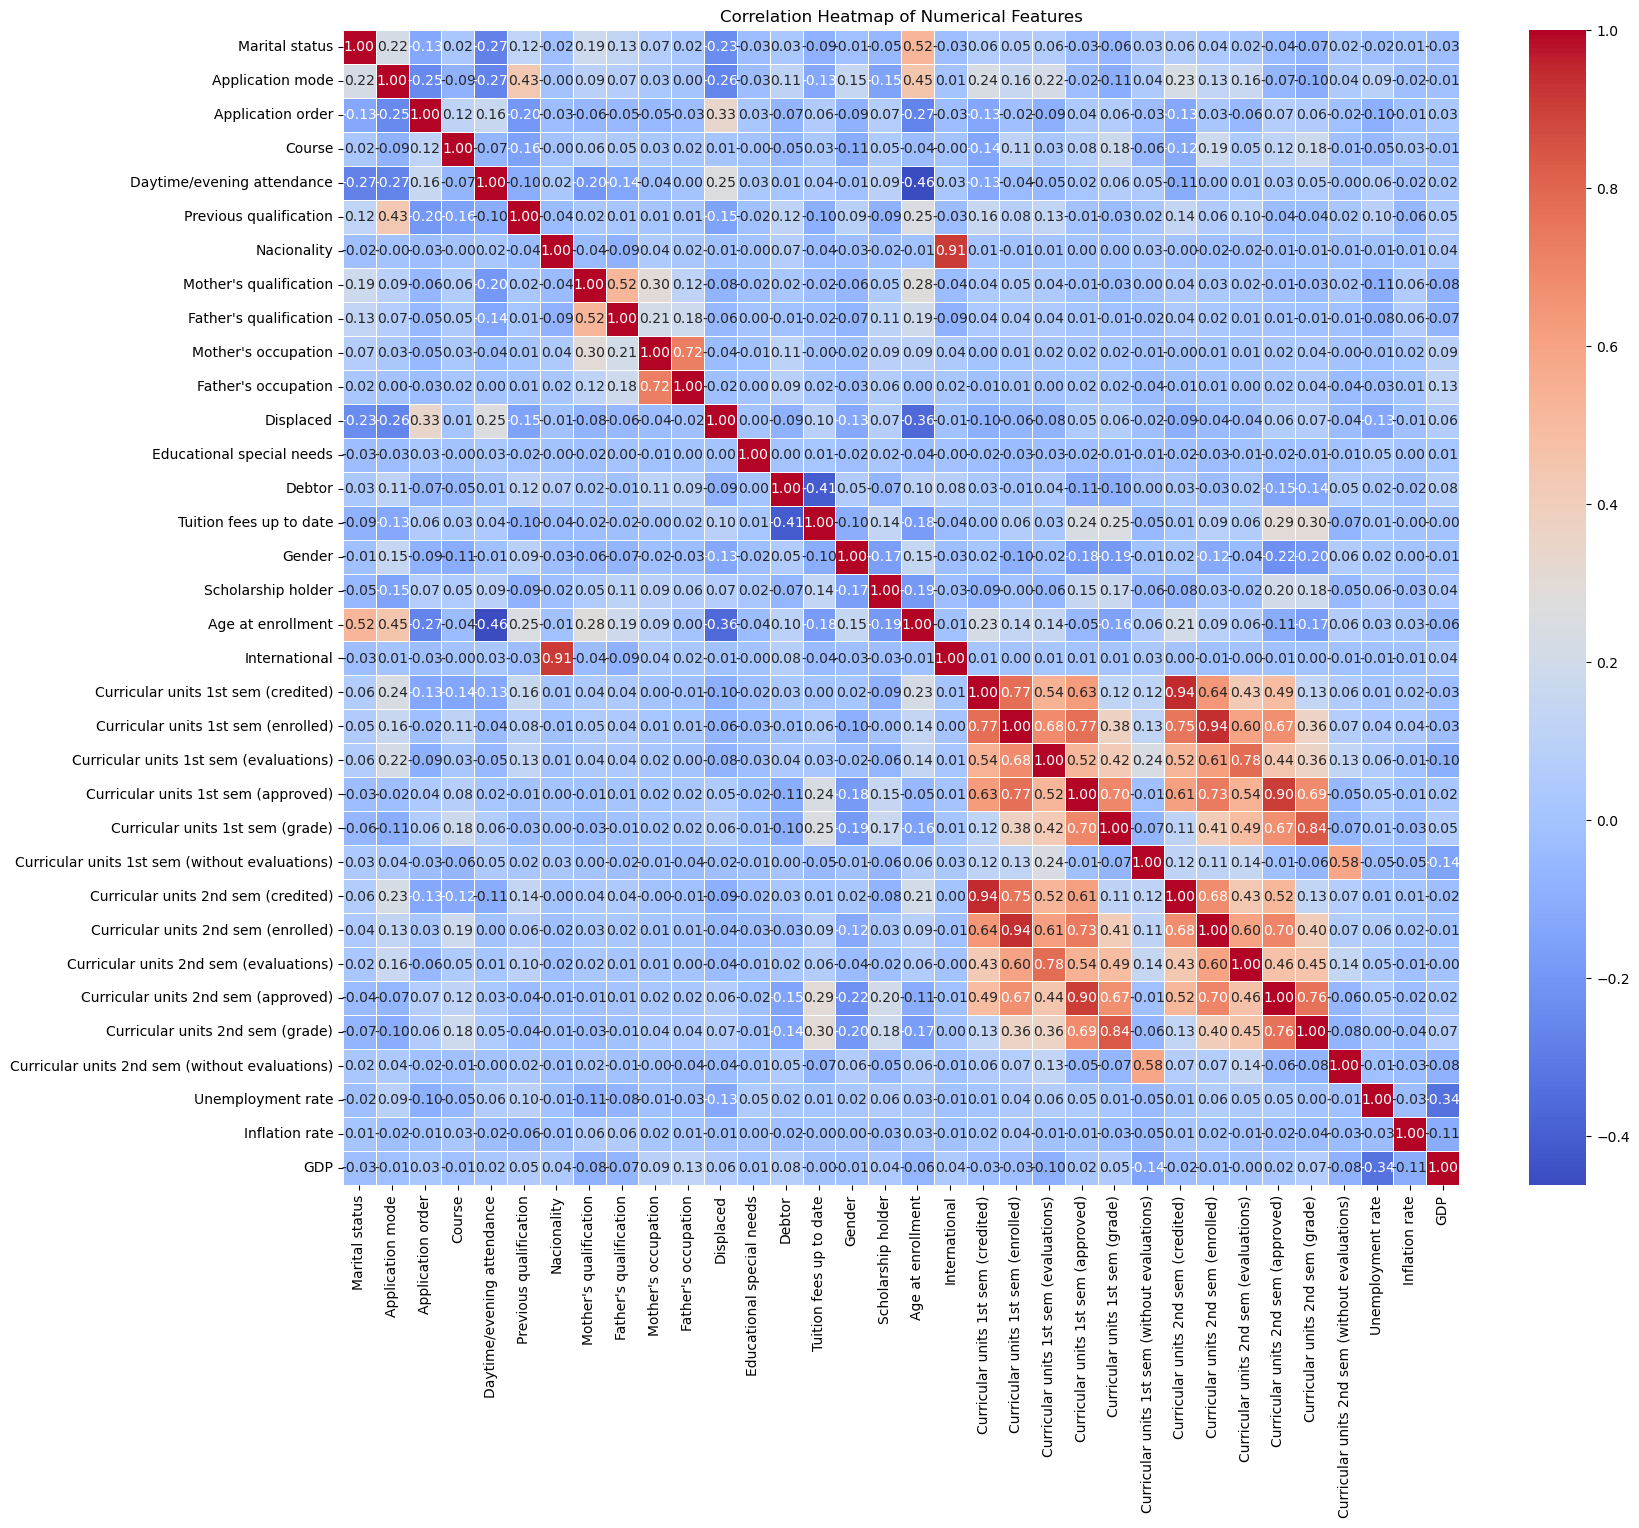

In [21]:
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

There are strong positive correlations among features related to academic performance, such as credits, evaluations, and grades in both semesters, indicating consistent performance across these metrics.


Most demographic and background features, as well as financial variables, show very weak correlations with each other and with academic performance, indicating they operate independently without a strong linear relationship to students' academic outcomes.

### Encode the Target Variable

In [25]:
le = LabelEncoder()
df['Target_Encoded'] = le.fit_transform(df['Target'])

In [26]:
print(df['Target_Encoded'])

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target_Encoded, Length: 4424, dtype: int64


In [27]:
X = df.drop(['Target', 'Target_Encoded'], axis=1) 
y = df['Target_Encoded']

### Split the Data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scale the Features

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")

Training data shape: (3539, 34)
Test data shape: (885, 34)


## Training Models

### Logistic Regression

In [32]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [33]:
y_pred_lr = model_lr.predict(X_test_scaled)

In [34]:
print("\nLogistic Regression Results")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr), 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))



Logistic Regression Results
Accuracy: 0.7559

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.82      0.79      0.80       316
    Enrolled       0.48      0.25      0.32       151
    Graduate       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.69      0.65      0.65       885
weighted avg       0.73      0.76      0.73       885



### Decision Tree

In [35]:
model_dt = DecisionTreeClassifier(criterion="entropy", random_state=42)
model_dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [36]:
y_pred_dt = model_dt.predict(X_test_scaled)

In [37]:
print("\nDecision Tree Results")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt), 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))


Decision Tree Results
Accuracy: 0.6938

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.72      0.70      0.71       316
    Enrolled       0.38      0.36      0.37       151
    Graduate       0.78      0.81      0.79       418

    accuracy                           0.69       885
   macro avg       0.63      0.62      0.63       885
weighted avg       0.69      0.69      0.69       885



### Random Forest

In [38]:
model_rf = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=42)
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [39]:
y_pred_rf = model_rf.predict(X_test_scaled)

In [40]:
print("\nDecision Tree Results")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


Decision Tree Results
Accuracy: 0.7661

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.82      0.75      0.79       316
    Enrolled       0.56      0.30      0.39       151
    Graduate       0.77      0.94      0.85       418

    accuracy                           0.77       885
   macro avg       0.72      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885



In [46]:
models = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'Decision Tree': y_pred_dt
}

model_metrics = {
    name: {
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred, average='weighted'),
        'Recall': recall_score(y_test, pred, average='weighted'),
        'F1-Score': f1_score(y_test, pred, average='weighted')
    }
    for name, pred in models.items()
}

df_results = pd.DataFrame(model_metrics).T

print("\n Model Comparison Table ")
print(df_results.to_markdown(floatfmt=".2f"))


 Model Comparison Table 
|                     |   Accuracy |   Precision |   Recall |   F1-Score |
|:--------------------|-----------:|------------:|---------:|-----------:|
| Logistic Regression |       0.76 |        0.73 |     0.76 |       0.73 |
| Random Forest       |       0.77 |        0.75 |     0.77 |       0.75 |
| Decision Tree       |       0.69 |        0.69 |     0.69 |       0.69 |


### Comparison Chart

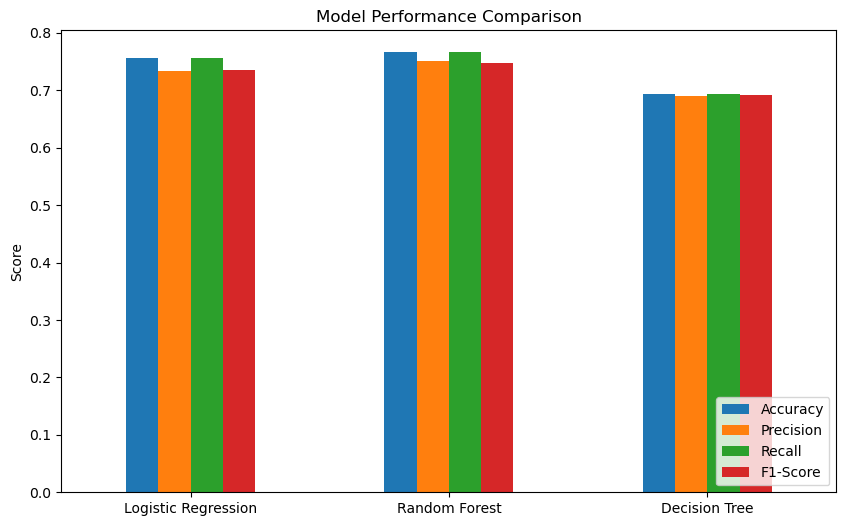

In [51]:
df_results.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

### Unseen training for best model

In [54]:
unseen_data = {
    'Marital status': [1, 1],
    'Application mode': [8, 1],
    'Application order': [1, 2],
    'Course': [11, 15],
    'Daytime/evening attendance': [1, 1],
    'Previous qualification': [1, 1],
    'Nacionality': [1, 1],
    "Mother's qualification": [1, 22],
    "Father's qualification": [3, 27],
    "Mother's occupation": [4, 10],
    "Father's occupation": [5, 10],
    'Displaced': [1, 0],
    'Educational special needs': [0, 0],
    'Debtor': [1, 0], 
    'Tuition fees up to date': [0, 1], 
    'Gender': [0, 1],
    'Scholarship holder': [0, 1],
    'Age at enrollment': [25, 19],
    'International': [0, 0],
    'Curricular units 1st sem (credited)': [0, 0],
    'Curricular units 1st sem (enrolled)': [6, 6],
    'Curricular units 1st sem (evaluations)': [6, 8],
    'Curricular units 1st sem (approved)': [0, 6], 
    'Curricular units 1st sem (grade)': [0.00, 14.5],
    'Curricular units 1st sem (without evaluations)': [0, 0],
    'Curricular units 2nd sem (credited)': [0, 0],
    'Curricular units 2nd sem (enrolled)': [6, 6],
    'Curricular units 2nd sem (evaluations)': [6, 7],
    'Curricular units 2nd sem (approved)': [0, 6], 
    'Curricular units 2nd sem (grade)': [0.00, 15.0], 
    'Curricular units 2nd sem (without evaluations)': [0, 0],
    'Unemployment rate': [10.8, 13.9],
    'Inflation rate': [1.4, -0.3],
    'GDP': [1.74, 0.79]
}

# Create the DataFrame
unseen_df = pd.DataFrame(unseen_data)

In [57]:
# Scale using the same scaler used during training
unseen_scaled = scaler.transform(unseen_df)

In [59]:
new_predictions = model_rf.predict(unseen_scaled)

predicted_labels = pd.Series(new_predictions).map({
    0: 'Dropout',
    1: 'Enrolled',
    2: 'Graduate'
})



In [60]:
print("Predictions for new, hardcoded data:")
for i, prediction in enumerate(predicted_labels):
    print(f"Student {i+1}: {prediction}")

Predictions for new, hardcoded data:
Student 1: Dropout
Student 2: Graduate
